In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")

print("Path to dataset files:", path)

Path to dataset files: /Users/rudrabrahmbhatt/.cache/kagglehub/datasets/oddrationale/mnist-in-csv/versions/2


In [6]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")

print("Path to dataset files:", path)

Path to dataset files: /Users/rudrabrahmbhatt/.cache/kagglehub/datasets/oddrationale/mnist-in-csv/versions/2


In [11]:
data = pd.read_csv('/Users/rudrabrahmbhatt/Documents/Machine Learning/archive/mnist_train.csv')

In [12]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Keep the first two columns as is
new_columns = list(data.columns[:1]) + [f'pixel{i}' for i in range(784)]

# Apply new column names
data.columns = new_columns

In [17]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

In [21]:
print(m,n)

60000 785


In [25]:
train_data = data[0:int(0.8*m), :]
val_data = data[int(0.8*m):m, :]

X_train = train_data[:, 1:].T
X_train = X_train / 255.0
Y_train = train_data[:, 0]

X_val = val_data[:, 1:].T
X_val = X_val / 255.0
Y_val = val_data[:, 0]

print(X_val.shape)
print(Y_val.shape)
print(X_train.shape)
print(Y_train.shape)

(784, 12000)
(12000,)
(784, 48000)
(48000,)


In [74]:
def initialize_parameter():
    W1 = np.random.rand(10,784) - 0.5
    B1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    B2 = np.random.rand(10,1) - 0.5
    return W1, B1, W2, B2 
def ReLU(X):
    return np.maximum(X, 0)

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def forward_propogation(W1, B1, W2, B2, X):
    Z1 = W1.dot(X) + B1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + B2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot_encoder(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def backward_propogation(W1, B1, W2, B2, Z1, A1, Z2, A2, X, Y):
    one_hot_Y = one_hot_encoder(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    dB2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2)*(Z1 > 0)
    dW1 = 1/m*dZ1.dot(X.T)
    dB1 = 1/m*np.sum(dZ1)
    return dW1, dW2, dB1, dB2

def update_parameters(W1, B1, W2, B2, dW1, dB1, dW2, dB2, learning_rate):
    W1 = W1 - learning_rate*dW1
    W2 = W2 - learning_rate*dW2
    B1 = B1 - learning_rate*dB1
    B2 = B2 - learning_rate*dB2
    return W1, B1, W2, B2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iteration):
    W1, B1, W2, B2 = initialize_parameter()

    for i in range(iteration):    
        Z1, A1, Z2, A2 = forward_propogation(W1, B1, W2, B2, X)
        dW1, dW2, dB1, dB2 = backward_propogation(W1, B1, W2, B2, Z1, A1, Z2, A2, X, Y)
        W1, B1, W2, B2 = update_parameters(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)

        if(i%20==0):
            print("iteration number: ", i)
            print("Accuracy= ", get_accuracy(get_predictions(A2), Y))
    return W1, B1, W2, B2
    

In [76]:
W1, B1, W2, B2 = gradient_descent(X_train, Y_train, 0.1, 1000)

iteration number:  0
Accuracy=  0.1624375
iteration number:  20
Accuracy=  0.2939791666666667
iteration number:  40
Accuracy=  0.38335416666666666
iteration number:  60
Accuracy=  0.43554166666666666
iteration number:  80
Accuracy=  0.47810416666666666
iteration number:  100
Accuracy=  0.5208333333333334
iteration number:  120
Accuracy=  0.5584791666666666
iteration number:  140
Accuracy=  0.5927291666666666
iteration number:  160
Accuracy=  0.6227291666666667
iteration number:  180
Accuracy=  0.6482916666666667
iteration number:  200
Accuracy=  0.6716458333333334
iteration number:  220
Accuracy=  0.693
iteration number:  240
Accuracy=  0.712875
iteration number:  260
Accuracy=  0.7284166666666667
iteration number:  280
Accuracy=  0.7430208333333334
iteration number:  300
Accuracy=  0.7559583333333333
iteration number:  320
Accuracy=  0.7654166666666666
iteration number:  340
Accuracy=  0.7749375
iteration number:  360
Accuracy=  0.7837916666666667
iteration number:  380
Accuracy=  0.7

predicted label:  [0]
actual_label:  0


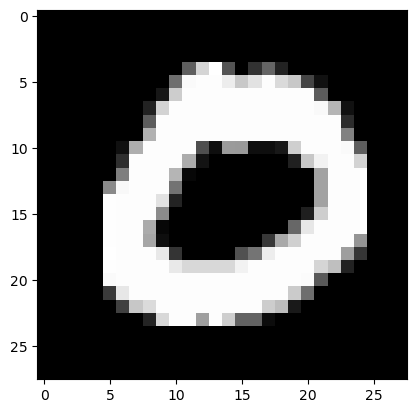

In [61]:
val_index = 900
Z1val, A1val, Z2val, A2val = forward_propogation(W1, B1, W2, B2, X_val[:,val_index, None])
print("predicted label: ", get_predictions(A2val))
print("actual_label: ", Y_val[val_index])

image_array = X_val[:,val_index].reshape(28,28)
plt.imshow(image_array, cmap="gray")
plt.show()

In [65]:
Z1val, A1val, Z2val, A2val = forward_propogation(W1, B1, W2, B2, X_val)
val_acc = get_accuracy(get_predictions(A2val), Y_val)
print("Validation accuracy: ", val_acc)

Validation accuracy:  0.87075
